 total number of rows and columns  (819, 10)
number of duplicate rows:  (36, 10)
No_Transactions                     819
No_Orders                           819
No_Payments                         819
Fraud                               819
paymentMethodRegistrationFailure    819
paymentMethodType                   819
paymentMethodProvider               819
transactionAmount                   819
transactionFailed                   819
orderState                          819
dtype: int64
No_Transactions                     783
No_Orders                           783
No_Payments                         783
Fraud                               783
paymentMethodRegistrationFailure    783
paymentMethodType                   783
paymentMethodProvider               783
transactionAmount                   783
transactionFailed                   783
orderState                          783
dtype: int64


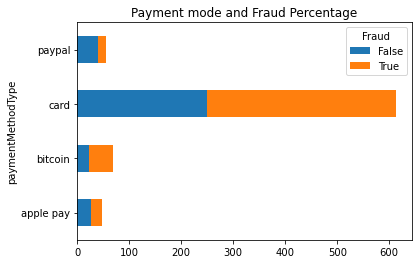

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# merged two dataframes to one dataframe
df1 = pd.read_csv('customer.csv')
df2 = pd.read_csv('transaction.csv')
df = df1.merge(df2, on='customerEmail')

# Checking the data type
# print(df.dtypes)

# Dropping irrelevant columns
df = df.drop(['Unnamed: 0_x', 'customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress', 'Unnamed: 0_y', 'transactionId', 'orderId', 'paymentMethodId'], axis=1)
# print(df.dtypes)

# Total number of rows and columns
total_number_of_rows = df.shape
print(" total number of rows and columns ", total_number_of_rows)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# Used to count the number of rows before removing the data
print(df.count())

df = df.drop_duplicates()

# Count the number of rows after removing the data
print(df.count())

# no column with null values , so no need to drop the missing or null values.

# next step
# plot bar graph for which payment has more fraudulent transactions ::: my method
df.groupby(['paymentMethodType', 'Fraud']).size().unstack().plot(kind='barh', stacked=True, title='Payment mode and Fraud Percentage', mark_right=True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
#import missingno as msno
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))



data = pd.read_csv('C:/Users/pc1/Desktop/Major Project ver/Customer_DF.csv', header = None)
data.columns = data.iloc[0]
data = data[1:]
display(data.head(5))
print('Dimension of data:', data.shape)

In [ ]:
data2 = pd.read_csv('C:/Users/pc1/Desktop/Major Project ver/cust_transaction_details.csv', header = None)
data2.columns = data2.iloc[0]
data2 = data2[1:]
display(data2.head(5))
print('Dimension of data:', data2.shape)

In [ ]:
sns.jointplot(x='paymentMethodType', y='transactionAmount', data=data2)



In [ ]:
sns.pairplot(data2)


In [ ]:
sns.lmplot(x='No_Transactions', y='No_Orders', data=data)

In [ ]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')
sns.jointplot(x='paymentMethodType', y='transactionAmount', data=data2)

In [ ]:
print('total customer records', data.shape[0], 'total unique customer' ,len(data.customerEmail.unique()))

In [ ]:
data[data['customerEmail'].duplicated()]
#As there are 8 duplicate mails in data, so all these are assumed as fraudlent.Creating a new column to detect these.

In [ ]:
data['Duplicate_Name'] = data['CustomerEmail'].apply(lambda x: 1 if (data[data.customerEmail==x]['customerEmail'].shape[0]>1)else 0)
data['Duplicate_IP'] = data['CustomerIPAddress'].apply(lambda x: 1 if (data[data.customerIPAddress==x]['CustomerIPAddress'].shape[0]>1)else 0)
data['Duplicate_Address'] = data['customerBillingAddress'].apply(lambda x: 1 if(data[data.customerBillingAddress==x]['customerBillingAddress'].shape[0]>1)else 0)

In [ ]:
data.head()

In [ ]:
#Customer with maximum transactions 
data[data.No_Transactions==data.No_Transactions.max()]

In [ ]:
#Customer with max Orders
data[data.No_Orders==data.No_Orders.max()]

In [ ]:
#Customer with max Payments
data[data.No_Payments==data.No_Payments.max()]

In [ ]:
data['Fraud_Found'] = data['Fraud'].apply(lambda x: 1 if x else 0)

In [ ]:
import math
print('Average no. of Payments:',round(data.No_Payments.mean()))
print('Average no. of Transactions:',round(data.No_Transactions.mean()))
print('Average no. of Orders:',round(data.No_Orders.mean()))

In [ ]:
data.groupby(by=['Fraud'])['Fraud'].count().plot(kind='bar')
plt.title('Fraud count')
plt.show()

In [ ]:
new_data = pd.melt(data[['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud']], "Fraud", var_name="features")

plt.figure(figsize=(12,6))
sns.swarmplot(x="features", y="value", hue="Fraud", palette=['b','r','c'], data=new_data)

In [ ]:
#As fraudlent transactions not very clearly distinguished,let's visualize the model another way.

In [ ]:
x = data[['No_Transactions','No_Orders','No_Payments']].values
y = data.Fraud_Found.values

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(x)

In [ ]:
target_ids = range(2)

plt.figure(figsize=(10,6))
colors= 'r','g'

for i, c, label in zip(target_ids, colors,['True','False']):
    plt.scatter(X[y== i,0], X[y== i,1], c=c, label=label)
plt.legend()
plt.show()

In [ ]:
#

In [ ]:
#Checking if a customer that has not opted for any payment method,is fraud
data[data.No_Payments==0]
#If the no. of payment methods are zero and there are no duplicates, then customer isn't a fraud.

In [ ]:
data2.paymentMethodType.unique()

In [ ]:
# Insight of all successfull transactions done by a customer till date

data2[(data2.transactionFailed>0) & (data2.customerEmail=='vmiller@hotmail.com')].unique()

In [ ]:
data2[(data2.orderState=='fulfilled')].sort_values(by=['customerEmail'])

In [ ]:
data[data.Fraud_Found==1]

In [ ]:
import os
from numpy import loadtxt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Join dataset and produce the result dataframe
customer = pd.read_csv("customer.csv",index_col=False)
customer_df = customer[["customerEmail","No_Transactions","No_Orders","No_Payments","Fraud"]]
transaction = pd.read_csv("transaction.csv",index_col=False)
transaction_df = transaction[["customerEmail","paymentMethodType","transactionAmount","orderState","paymentMethodProvider"]]
print(customer_df.head())
print(transaction_df.head())
result = pd.merge(transaction_df,customer_df,on='customerEmail')
print(result.head())




In [ ]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "import os\n",
    "from numpy import loadtxt\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "from xgboost import XGBClassifier\n",
    "from sklearn.model_selection import train_test_split\n",
    "from sklearn.metrics import accuracy_score\n",
    "from xgboost import plot_importance\n",
    "from matplotlib import pyplot\n",
    "from sklearn.model_selection import GridSearchCV\n",
    "from sklearn.model_selection import StratifiedKFold"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "               customerEmail  No_Transactions  No_Orders  No_Payments  Fraud\n",
      "0     josephhoward@yahoo.com                2          2            1  False\n",
      "1     evansjeffery@yahoo.com                3          3            7   True\n",
      "2  andersonwilliam@yahoo.com                5          3            2  False\n",
      "3      rubenjuarez@yahoo.com                3          3            1  False\n",
      "4           uchen@malone.com                7          7            6   True\n",
      "            customerEmail paymentMethodType  transactionAmount orderState  \\\n",
      "0  josephhoward@yahoo.com              card                 18    pending   \n",
      "1  josephhoward@yahoo.com              card                 26  fulfilled   \n",
      "2  evansjeffery@yahoo.com           bitcoin                 45  fulfilled   \n",
      "3  evansjeffery@yahoo.com           bitcoin                 23  fulfilled   \n",
      "4  evansjeffery@yahoo.com           bitcoin                 43  fulfilled   \n",
      "\n",
      "  paymentMethodProvider  \n",
      "0          JCB 16 digit  \n",
      "1          JCB 16 digit  \n",
      "2      American Express  \n",
      "3      American Express  \n",
      "4         VISA 16 digit  \n",
      "            customerEmail paymentMethodType  transactionAmount orderState  \\\n",
      "0  josephhoward@yahoo.com              card                 18    pending   \n",
      "1  josephhoward@yahoo.com              card                 26  fulfilled   \n",
      "2  evansjeffery@yahoo.com           bitcoin                 45  fulfilled   \n",
      "3  evansjeffery@yahoo.com           bitcoin                 23  fulfilled   \n",
      "4  evansjeffery@yahoo.com           bitcoin                 43  fulfilled   \n",
      "\n",
      "  paymentMethodProvider  No_Transactions  No_Orders  No_Payments  Fraud  \n",
      "0          JCB 16 digit                2          2            1  False  \n",
      "1          JCB 16 digit                2          2            1  False  \n",
      "2      American Express                3          3            7   True  \n",
      "3      American Express                3          3            7   True  \n",
      "4         VISA 16 digit                3          3            7   True  \n"
     ]
    }
   ],
   "source": [
    "# Join dataset and produce the result dataframe\n",
    "customer = pd.read_csv(\"customer.csv\",index_col=False)\n",
    "customer_df = customer[[\"customerEmail\",\"No_Transactions\",\"No_Orders\",\"No_Payments\",\"Fraud\"]]\n",
    "transaction = pd.read_csv(\"transaction.csv\",index_col=False)\n",
    "transaction_df = transaction[[\"customerEmail\",\"paymentMethodType\",\"transactionAmount\",\"orderState\",\"paymentMethodProvider\"]]\n",
    "print(customer_df.head())\n",
    "print(transaction_df.head())\n",
    "result = pd.merge(transaction_df,customer_df,on='customerEmail')\n",
    "print(result.head())\n",
    "\n",
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "   cust_id  order_state_num  pay_method  pay_method_provider  No_Transactions  \\\n",
      "0        0                0           0                    0                2   \n",
      "1        0                1           0                    0                2   \n",
      "2        1                1           1                    1                3   \n",
      "3        1                1           1                    1                3   \n",
      "4        1                1           1                    2                3   \n",
      "\n",
      "   No_Orders  No_Payments  transactionAmount  fraud_num  \n",
      "0          2            1                 18          0  \n",
      "1          2            1                 26          0  \n",
      "2          3            7                 45          1  \n",
      "3          3            7                 23          1  \n",
      "4          3            7                 43          1  \n"
     ]
    }
   ],
   "source": [
    "# Data Preparation - Conversion from categorical values to numeric values and save numeric data frame to training_data_final.csv\n",
    "arr_customer=result['customerEmail'].unique()\n",
    "result['cust_id']=result['customerEmail'].apply(lambda x: arr_customer.tolist().index(x))\n",
    "arr_method=result['paymentMethodType'].unique()\n",
    "result['pay_method']=result['paymentMethodType'].apply(lambda x: arr_method.tolist().index(x))\n",
    "arr_method_provider=result['paymentMethodProvider'].unique()\n",
    "result['pay_method_provider']=result['paymentMethodProvider'].apply(lambda x: arr_method_provider.tolist().index(x))\n",
    "arr_order_state=result['orderState'].unique()\n",
    "result['order_state_num']=result['orderState'].apply(lambda x: arr_order_state.tolist().index(x))\n",
    "arr_fraud=result['Fraud'].unique()\n",
    "result['fraud_num']=result['Fraud'].apply(lambda x: arr_fraud.tolist().index(x))\n",
    "num_df = result[[\"cust_id\",\"order_state_num\",\"pay_method\",\"pay_method_provider\",\"No_Transactions\",\"No_Orders\",\"No_Payments\",\"transactionAmount\",\"fraud_num\"]]\n",
    "num_df.to_csv(\"training_data_final.csv\", sep=',', encoding='utf-8',index=False)\n",
    "print(num_df.head())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Accuracy: 97.05%\n"
     ]
    }
   ],
   "source": [
    "dataset = pd.read_csv(\"training_data_final.csv\",index_col=False)\n",
    "X = dataset.iloc[:,0:8]\n",
    "Y = dataset.iloc[:,8]\n",
    "seed = 7\n",
    "test_size = 0.33\n",
    "X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)\n",
    "model = XGBClassifier()\n",
    "model.fit(X_train, y_train)\n",
    "\n",
    "\n",
    "# Create Prediction Record and Predict if Fraud is True or False\n",
    "predictions = model.predict(X_test)\n",
    "accuracy = accuracy_score(y_test, predictions)\n",
    "print(\"Accuracy: %.2f%%\" % (accuracy * 100.0))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.6.8"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}


In [ ]:
import os
from numpy import loadtxt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Join dataset and produce the result dataframe
customer = pd.read_csv("customer.csv",index_col=False)
customer_df = customer[["customerEmail","No_Transactions","No_Orders","No_Payments","Fraud"]]
transaction = pd.read_csv("transaction.csv",index_col=False)
transaction_df = transaction[["customerEmail","paymentMethodType","transactionAmount","orderState","paymentMethodProvider"]]
print(customer_df.head())
print(transaction_df.head())
result = pd.merge(transaction_df,customer_df,on='customerEmail')
print(result.head())




In [ ]:
# Data Preparation - Conversion from categorical values to numeric values and save numeric data frame to training_data_final.csv
arr_customer=result['customerEmail'].unique()
result['cust_id']=result['customerEmail'].apply(lambda x: arr_customer.tolist().index(x))
arr_method=result['paymentMethodType'].unique()
result['pay_method']=result['paymentMethodType'].apply(lambda x: arr_method.tolist().index(x))
arr_method_provider=result['paymentMethodProvider'].unique()
result['pay_method_provider']=result['paymentMethodProvider'].apply(lambda x: arr_method_provider.tolist().index(x))
arr_order_state=result['orderState'].unique()
result['order_state_num']=result['orderState'].apply(lambda x: arr_order_state.tolist().index(x))
arr_fraud=result['Fraud'].unique()
result['fraud_num']=result['Fraud'].apply(lambda x: arr_fraud.tolist().index(x))
num_df = result[["cust_id","order_state_num","pay_method","pay_method_provider","No_Transactions","No_Orders","No_Payments","transactionAmount","fraud_num"]]
num_df.to_csv("training_data_final.csv", sep=',', encoding='utf-8',index=False)
print(num_df.head())

In [ ]:
dataset = pd.read_csv("training_data_final.csv",index_col=False)
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)


# Create Prediction Record and Predict if Fraud is True or False
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
